In [20]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [44]:
file = h5py.File('./output_27k_0.01_Gadget/snap_1396.hdf5', 'r')

In [45]:
file.keys()

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0']>

In [46]:
file['Parameters']

<HDF5 group "/Parameters" (0 members)>

In [47]:
file['PartType0'].keys()

<KeysViewHDF5 ['Coordinates', 'Density', 'InternalEnergy', 'Masses', 'ParticleIDs', 'SmoothingLength', 'Velocities']>

In [48]:
coord = file['PartType0']['Coordinates']
coord

<HDF5 dataset "Coordinates": shape (27083, 3), type "<f4">

In [49]:
h = file['PartType0']['SmoothingLength']

np.min(h), np.max(h), np.median(h)

(0.0023087282, 1.2422084, 0.11486434)

In [50]:
mass = file['PartType0']['Masses']

np.min(mass), np.max(mass), np.median(mass)

(3.692353e-05, 3.692353e-05, 3.692353e-05)

In [51]:
M_sun = 1.98992e+33 # gram
UnitMass_in_g = 1.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!
UnitRadius_in_cm = 5e+16  #!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!!
UnitDensity_in_cgs = UnitMass_in_g / UnitRadius_in_cm**3

print(f'UnitDensity_in_cgs = {UnitDensity_in_cgs} g/cm^3')

G = 6.6738e-8
rgas = 9.2e16                                     # The initial radius of the cloud in cm
rho0 = 6.02e-19                                   # The initial average density
tff = np.sqrt(3*np.pi/(32*G*rho0))                # The free-fall time = 3.4e4 yr
unitTime_in_s = tff                               # Scaling time to free-fall time
unitLength_in_cm = rgas                           # Scaling distance to the initial cloud radius

unitVelocity_in_cm_per_s = unitLength_in_cm / unitTime_in_s          # The internal velocity unit
print(f'unitVelocity_in_cm_per_s = {round(unitVelocity_in_cm_per_s, 2)} cm/s')

UnitDensity_in_cgs = 1.591936e-17 g/cm^3
unitVelocity_in_cm_per_s = 33979.12 cm/s


In [52]:
rho = list(file['PartType0']['Density'])
M_sun = 1.98992e+33 # gram
UnitMass_in_g = 1.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!
UnitRadius_in_cm = 9.2e16  #!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!!
UnitDensity_in_cgs = UnitMass_in_g / UnitRadius_in_cm**3

np.sort(rho)* UnitDensity_in_cgs

array([6.2728508e-22, 6.4018534e-22, 6.5073381e-22, ..., 9.0792899e-14,
       9.1464847e-14, 9.3247363e-14], dtype=float32)

In [53]:
x = coord[:, 0]
y = coord[:, 1]
z = coord[:, 2]

# delta = 0.02

# nz = np.where((z >= -delta) & (z <= delta))[0]
# print(len(nz))

# x = x[nz]
# y = y[nz]
# z = z[nz]

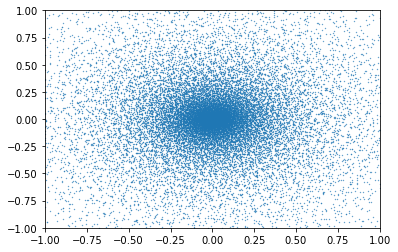

In [54]:
plt.scatter(x, z, s = 0.1)
plt.xlim(-1, 1)
plt.ylim(-1, 1);

In [55]:
radius = (x*x + y*y + z*z)**0.5

In [56]:
d = (x*x + y*y + z*z)**0.5 * UnitRadius_in_cm

xgrid = np.linspace(14.2, 16.5, 20)

res = []

for i in range(1, len(xgrid)-1):
    
    nt = np.where((np.log10(d)>=xgrid[0]) & (np.log10(d)<xgrid[i+1]))[0]
    
    m = np.sum(mass[nt])
    
    res.append([xgrid[i], m])

res = np.array(res)

d = res[:, 0]
m = res[:, 1]
    

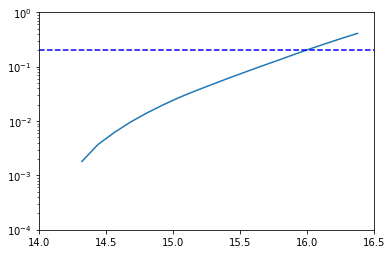

In [57]:
plt.plot(d, m)
plt.yscale('log')
plt.xlim(14, 16.5)
plt.ylim(0.0001, 1)

plt.axhline(y = 0.2, linestyle = '--', color = 'blue');